In [151]:
import numpy as np
from matplotlib import pyplot as plt
import sys
sys.path.append("../code/")
from celmech.maps import StandardMap

from DiffusionExperimentUtils import estimate_diffusion_coefficient
from sos_utils import get_map_pts

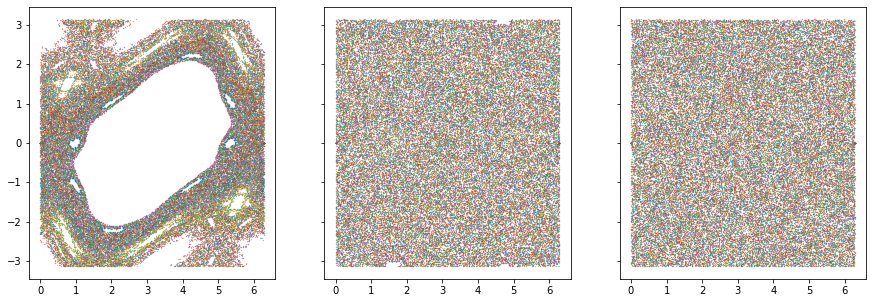

In [161]:
smap = StandardMap(2)
pts = np.array([[0,dx] for dx in 1e-5 * np.random.normal(size=64)])
Kvals = np.geomspace(1.3,30,3)
wrap2pi = lambda x: np.mod(x+np.pi,2*np.pi)-np.pi
fig,ax = plt.subplots(1,len(Kvals),sharex=True,sharey=True,figsize=(15,5))
for j,K in enumerate(Kvals):
    smap.K = K
    for pt in pts:
        orbit = get_map_pts(pt,smap,1000)
        theta,p = np.transpose(orbit)
        ax[j].plot(theta,wrap2pi(p),'.',ms=0.5)

In [153]:
N=3000
D_by_DQL = []
D_by_DQL_eb = []
L = 1000
Kvals = np.linspace(1.3,30,30)
for K in Kvals:
    smap.K = K
    Dest,Derr = estimate_diffusion_coefficient(smap,pts,N)
    DQL = smap.K*smap.K*0.5
    D_by_DQL.append(Dest[L]/DQL)
    D_by_DQL_eb.append(Derr[L]/DQL)
    

In [155]:
from scipy.special import jn

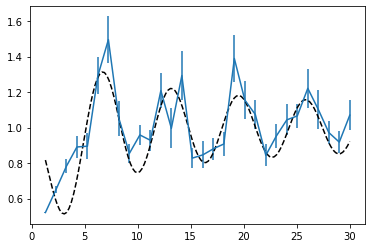

In [160]:
plt.errorbar(Kvals,D_by_DQL,yerr = D_by_DQL_eb)
plt.plot(np.linspace(1.3,30,130),1-jn(2,np.linspace(1.3,30,130)),'k--')

In [16]:
from celmech.maps import CometMap 

In [ ]:
cmap = CometMap(5.15e-5,10,4/3,kmax=24)

In [23]:
wrap1 = lambda x: np.mod(x+0.5,1)-0.5
pts = np.array([[0,dx] for dx in 1e-5 * np.random.normal(size=64)])

In [33]:
cmap.m = 5.15e-5

In [34]:
cmap.get_eps_crit(), cmap.eps

(0.0014092512237631255, 0.007171254747931742)

In [102]:
cmap.q = 35/30
cmap.kmax = 50

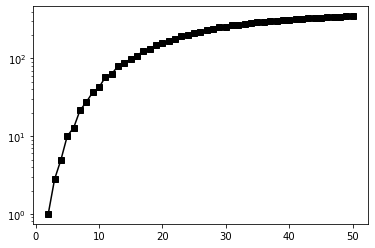

In [107]:
kk=range(2,cmap.kmax+1)
plt.plot(kk,[cmap.get_eps_crit(kmax=2)/cmap.get_eps_crit(kmax=k) for k in kk],'ks-')
plt.yscale('log')

1.8294474708798767e-05
8.181537812304943e-05
0.00036588949417597536


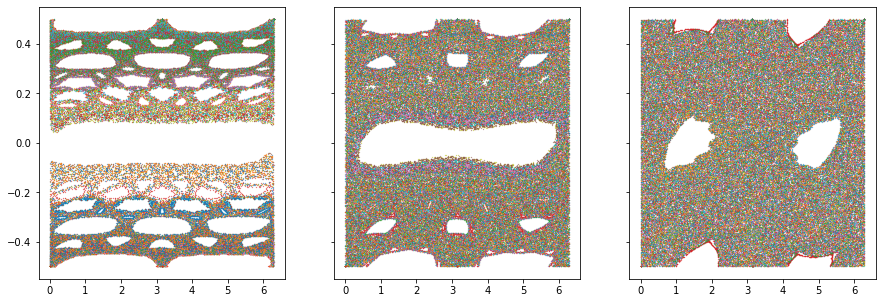

In [112]:
Kvals = np.geomspace(0.1,1,3)#[0.135,1,10]
fig,ax = plt.subplots(1,len(Kvals),sharex=True,sharey=True,figsize=(15,5))

for j,K in enumerate(Kvals):
    cmap.m = K *  cmap.m * cmap.get_eps_crit(kmax=2) / cmap.eps
    print(cmap.m)
    for pt in pts:
        orbit = get_map_pts(pt,cmap,2000)
        theta,p = np.transpose(orbit)
        ax[j].plot(theta,wrap1(p),'.',ms=0.5)

1.0976684825279261e-05


(0.0, 0.1)

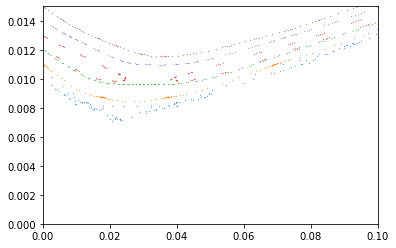

In [142]:
cmap.m = 0.03 *  cmap.m * cmap.get_eps_crit(kmax=2) / cmap.eps
xmax = 0.015
pts = np.array([[0,0.0+dx] for dx in np.linspace(0.01,xmax,6)])
print(cmap.m)
for pt in pts:
    orbit = get_map_pts(pt,cmap,2000)
    theta,p = np.transpose(orbit)
    plt.plot(theta,wrap1(p),'.',ms=0.5)
plt.ylim(0,xmax)
plt.xlim(0,0.1)

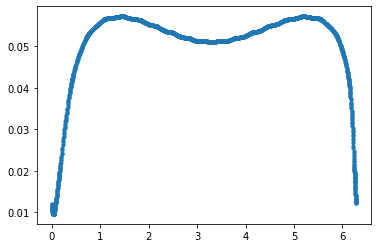

In [143]:
orbit = get_map_pts(pts[2],cmap,2000)
plt.plot(*np.transpose(orbit),'.')

In [144]:

theta = np.cumsum(wrap2pi(np.convolve([1,-1],orbit[:,0],mode='valid')))
rho,_ = np.polyfit(np.arange(2000-1),theta,1)

In [113]:
wrap1((np.sqrt(5)-1)/2)

-0.3819660112501051

In [ ]:
N=1000

In [109]:

D_by_DQL = []
D_by_DQL_eb = []

for K in Kvals:
    cmap.m =  cmap.m * K  * cmap.get_eps_crit(kmax=2) / cmap.eps
    Dest,Derr = estimate_diffusion_coefficient(cmap,pts,N)
    DQL = cmap.D_QL()
    D_by_DQL.append(Dest/DQL)
    D_by_DQL_eb.append(Derr/DQL)


In [110]:
L=500

(0.0, 1.5)

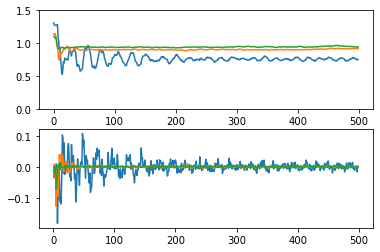

In [111]:
fig,ax = plt.subplots(2,1)
for y in D_by_DQL:
    ax[0].plot(np.arange(L),y[:L])
    ax[1].plot(np.arange(1,L),np.convolve([1,-1],y[:L],'valid'))
ax[0].set_ylim(0,1.5)

<ErrorbarContainer object of 3 artists>

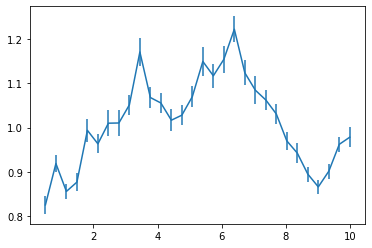

In [42]:
N=3000
D_by_DQL = []
D_by_DQL_eb = []
L = 100
Kvals = np.linspace(0.1,10,30)
for K in Kvals:
    cmap.m =  cmap.m * K  * cmap.get_eps_crit(kmax=2) / cmap.eps
    Dest,Derr = estimate_diffusion_coefficient(cmap,pts,N)
    DQL = cmap.D_QL()
    D_by_DQL.append(Dest[L]/DQL)
    D_by_DQL_eb.append(Derr[L]/DQL)
    

plt.errorbar(Kvals,D_by_DQL,yerr = D_by_DQL_eb)